## Artificial vortex array flow test

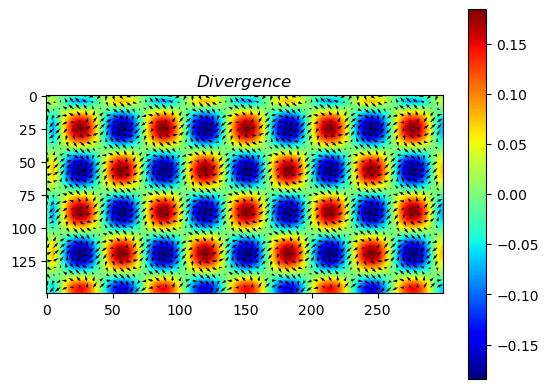

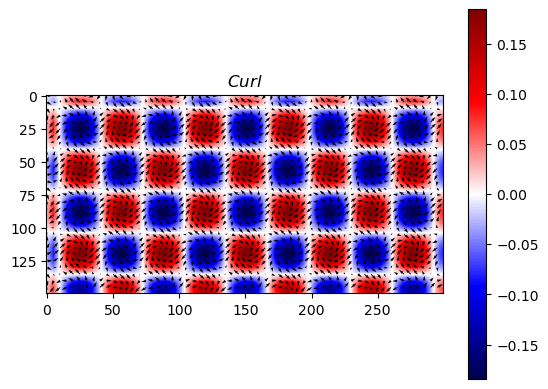

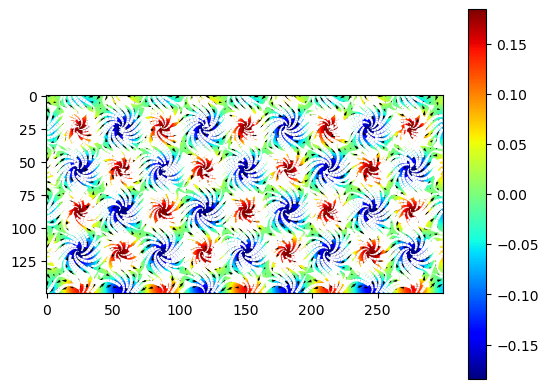

In [81]:
# %% OPTION 1
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
%matplotlib inline

def divergence_npgrad(flow):
    # flow = np.swapaxes(flow, 0, 1)
    Fx, Fy = flow[:, :, 0], flow[:, :, 1]
    dFx_dx = np.gradient(Fx, axis=0)
    dFy_dy = np.gradient(Fy, axis=1)
    return dFx_dx + dFy_dy

def curl_npgrad(flow):
    # flow = np.swapaxes(flow, 0, 1)
    Fx, Fy = flow[:, :, 0], flow[:, :, 1]
    dFx_dy = np.gradient(Fx, axis=1)
    dFy_dx = np.gradient(Fy, axis=0)
    curl = dFy_dx - dFx_dy
    return curl

def smooth_field(f, filter_size=11):
    filter_size = 11
    filt = np.outer(np.exp(np.linspace(-1, 1, filter_size)), np.exp(np.linspace(-1, 1, filter_size)))
    filt = filt / filt.sum()
    return convolve2d(f, filt, mode='same')

y, x = np.mgrid[0:150, 0:300]
u = np.cos((x + y)/10) #* np.random.rand(*x.shape)
v = np.sin((x - y)/10) #* np.random.rand(*x.shape)
field = np.stack((u, v), axis=-1)
divergence = smooth_field(divergence_npgrad(field), filter_size=10)
vorticity = smooth_field(curl_npgrad(field), filter_size=10)

plt.figure()
step = 5
plt.quiver(x[::step, ::step], y[::step, ::step], field[::step, ::step, 0], field[::step, ::step, 1])
plt.imshow(divergence, cmap="jet")
plt.title("$Divergence$")
plt.colorbar()

plt.figure()
plt.quiver(x[::step, ::step], y[::step, ::step], field[::step, ::step, 0], field[::step, ::step, 1])
plt.imshow(vorticity, cmap="seismic")
plt.title("$Curl$")
plt.colorbar()

#  Varying line width along a streamline
speed = np.sqrt(u**2 + v**2)
lw = 3*speed / speed.max()
step = 5
plt.figure()
plt.quiver(x[::step, ::step], y[::step, ::step], field[::step, ::step, 0], field[::step, ::step, 1], color="k")#, scale=30
plt.streamplot(x, y, field[..., 0], -field[..., 1], density=3., color='white', linewidth=lw)
plt.imshow(divergence, cmap="jet")
plt.colorbar()

In [ ]:
# %% OPTION 2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
%matplotlib inline

def divergence_npgrad(flow):
    flow = np.swapaxes(flow, 0, 1)
    Fx, Fy = flow[:, :, 0], flow[:, :, 1]
    dFx_dx = np.gradient(Fx, axis=0)
    dFy_dy = np.gradient(Fy, axis=1)
    return dFx_dx + dFy_dy

def curl_npgrad(flow):
    flow = np.swapaxes(flow, 0, 1)
    Fx, Fy = flow[:, :, 0], flow[:, :, 1]
    dFx_dy = np.gradient(Fx, axis=1)
    dFy_dx = np.gradient(Fy, axis=0)
    curl = dFy_dx - dFx_dy
    return curl

def smooth_field(f, filter_size=11):
    filter_size = 11
    filt = np.outer(np.exp(np.linspace(-1, 1, filter_size)), np.exp(np.linspace(-1, 1, filter_size)))
    filt = filt / filt.sum()
    return convolve2d(f, filt, mode='same')

y, x = np.mgrid[0:150, 0:300]
u = np.cos((x + y)/10) #* np.random.rand(*x.shape)
v = np.sin((x - y)/10) #* np.random.rand(*x.shape)
field = np.stack((u, v), axis=-1)
divergence = smooth_field(divergence_npgrad(field), filter_size=10)
vorticity = smooth_field(curl_npgrad(field), filter_size=10)

plt.figure()
step = 5
plt.quiver(x[::step, ::step], y[::step, ::step], field[::step, ::step, 0], -field[::step, ::step, 1])
plt.imshow(divergence.T, cmap="jet")
plt.title("$Divergence$")
plt.colorbar()

plt.figure()
plt.quiver(x[::step, ::step], y[::step, ::step], field[::step, ::step, 0], -field[::step, ::step, 1])
plt.imshow(vorticity.T, cmap="seismic")
plt.title("$Curl$")
plt.colorbar()

#  Varying line width along a streamline
speed = np.sqrt(u**2 + v**2)
lw = 3*speed / speed.max()
step = 5
plt.figure()
plt.quiver(x[::step, ::step], y[::step, ::step], field[::step, ::step, 0], -field[::step, ::step, 1], color="k")#, scale=30
plt.streamplot(x, y, field[..., 0], field[..., 1], density=3., color='white', linewidth=lw)
plt.imshow(divergence.T, cmap="jet")
plt.colorbar()

In [ ]:
# %%
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from skimage import io
%matplotlib inline

def divergence_npgrad(flow):
    flow = np.swapaxes(flow, 0, 1)
    Fx, Fy = flow[:, :, 0], flow[:, :, 1]
    dFx_dx = np.gradient(Fx, axis=0)
    dFy_dy = np.gradient(Fy, axis=1)
    return dFx_dx + dFy_dy

def curl_npgrad(flow):
    flow = np.swapaxes(flow, 0, 1)
    Fx, Fy = flow[:, :, 0], flow[:, :, 1]
    dFx_dy = np.gradient(Fx, axis=1)
    dFy_dx = np.gradient(Fy, axis=0)
    curl = dFy_dx - dFx_dy
    return curl

def smooth_field(f, filter_size=11):
    filter_size = 15
    filt = np.outer(np.exp(np.linspace(-1, 1, filter_size)), np.exp(np.linspace(-1, 1, filter_size)))
    filt = filt / filt.sum()
    return convolve2d(f, filt, mode='same')

# Load the images
im = io.imread("../_bacteria/hbec_images/rotations-1.tif")[:,:-100, :]
im_num = 0
im1 = im[im_num]
im2 = im[im_num+1]

# Calculate the optical flow using Lucas-Kanade method
flow = cv2.calcOpticalFlowFarneback(im1,im2, None, 0.5, 3, 
        winsize=15, iterations=3, poly_n=5, poly_sigma=1.2, flags=0)  
u, v = flow[:,:,0], flow[:,:,1]
y, x = np.mgrid[0:im1.shape[0], 0:im1.shape[1]]
field = np.stack((u, v), axis=-1)
divergence = smooth_field(divergence_npgrad(field), filter_size=50)
vorticity = smooth_field(curl_npgrad(field), filter_size=3)

plt.figure(figsize=(8,5))
step = 10
speed = np.sqrt(u**2 + v**2)
lw = 3*speed / speed.max()
# plt.quiver(x[::step, ::step], y[::step, ::step], field[::step, ::step, 0], -field[::step, ::step, 1])
plt.streamplot(x, y, field[..., 0], field[..., 1], density=3., color='k', linewidth=lw)
plt.imshow(vorticity.T, cmap="jet", vmin=-.2, vmax=.2)
plt.title("$vorticity$")
plt.colorbar()

plt.figure(figsize=(8,5))
plt.quiver(x[::step, ::step], y[::step, ::step], field[::step, ::step, 0], -field[::step, ::step, 1])
# plt.streamplot(x, y, field[..., 0], field[..., 1], density=3., color='k', linewidth=lw)
plt.imshow(divergence.T, cmap="jet", vmin=-.2, vmax=.2)
plt.title("$divergence$")
plt.colorbar()

# Create animated gif with flows

In [ ]:
import cv2
import glob
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
from natsort import natsorted
%matplotlib qt

image_list = glob.glob(r"C:/Users/victo/Downloads/SB_lab/RPE1_C2C12_/Test002/*.tif")
image_list = natsorted(image_list, key=lambda y: y.lower())

fig, ax = plt.subplots(figsize=(10,10))
ax.set_axis_off()


def update(frame):
    ax.clear()
    im1 = image_list[frame]
    im2 = image_list[frame+1]
    img1 = cv2.imread(im1)[:,:,0]
    img2 = cv2.imread(im2)[:,:,0]
    flow = cv2.calcOpticalFlowFarneback(img1,img2, None, 0.5, 3, 
        winsize=15, iterations=3, poly_n=5, poly_sigma=1.2, flags=0)       
    step = 15
    ax.imshow(img1, cmap="gray")
    x = np.arange(0, flow.shape[1], step, dtype=np.int16)
    y = np.arange(0, flow.shape[0], step, dtype=np.int16)
    return ax.quiver(x, y, flow[::step, ::step, 0], -flow[::step, ::step, 1], color="red")

anim = FuncAnimation(fig, update, frames=len(image_list)-1, interval=100)
anim.save(r"C:/Users/victo/Downloads/SB_lab/RPE1_C2C12_/test002.gif") 
plt.show()

## Averaged flows


In [83]:
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np
from natsort import natsorted
%matplotlib qt

# image_list = glob.glob(r"C:/Users/victo/Downloads/SB_lab/RPE1_C2C12_/Test001/*.tif")
image_list = glob.glob(r"C:\Users\victo\My Drive\Curie\Trinish\30_01_18_RPE1_C2C12_5x_phase_nuclei\*s14*.tif")
image_list = natsorted(image_list, key=lambda y: y.lower())[50:70]

fig, ax = plt.subplots(1,2, figsize=(12,6))
# ax.set_axis_off()

u = np.zeros_like(cv2.imread(image_list[0])[:,:,0], dtype=np.float32)
v = np.zeros_like(u)
prev = cv2.imread(image_list[0])
prevgray = cv2.cvtColor(prev, cv2.COLOR_BGR2GRAY)
hsv = np.zeros_like(prev)

for im1, im2 in zip(image_list[:-1], image_list[1:]):
    img1 = cv2.imread(im1)[:,:,0]
    img2 = cv2.imread(im2)[:,:,0]
    flow = cv2.calcOpticalFlowFarneback(img1,img2, None, 0.5, 3, 
        winsize=15, iterations=3, poly_n=5, poly_sigma=1.2, flags=0)  
    u += flow[..., 0]
    v += flow[..., 1]

mag, ang = cv2.cartToPolar(u, v)
hsv[..., 1] = 255
hsv[..., 0] = ang * 180 / np.pi / 2
hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
rgb = cv2.cvtColor(hsv,cv2.COLOR_HSV2RGB)

ax[0].imshow(u, cmap="seismic")   
# ax[1].imshow(v, cmap="seismic")   
# cf = ax[1].imshow(np.arctan2(v,u)*180/np.pi, cmap="jet")    
cf = ax[1].imshow(rgb, cmap="jet")  
plt.colorbar(cf, ax=ax[1])


## Add Orientation

In [92]:
from scipy.ndimage import gaussian_filter
import sys
sys.path.append('../vasco_scripts')  # add the relative path to the folder
from defects import *  # import the module from the folder

def shear(flow):
    # flow = np.swapaxes(flow, 0, 1)
    Fx, Fy = flow[:, :, 0], flow[:, :, 1]
    dFx_dx, dFx_dy = np.gradient(Fx)
    dFy_dx, dFy_dy = np.gradient(Fy)
    return dFx_dy + dFy_dx

def divergence_npgrad(flow):
    # flow = np.swapaxes(flow, 0, 1)
    Fx, Fy = flow[:, :, 0], flow[:, :, 1]
    dFx_dx = np.gradient(Fx, axis=0)
    dFy_dy = np.gradient(Fy, axis=1)
    return dFx_dx + dFy_dy

flow = np.stack((u, v), axis=-1)
flow_shear = gaussian_filter(shear(flow), sigma=30)
plt.imshow(flow_shear, "seismic")
plt.colorbar()

img = cv2.imread(image_list[-1])[..., 0]

yy, xx = np.mgrid[0:img.shape[0], 0:img.shape[1]]
ori, coh, E = orientation_analysis(img, 25)
s = 20
# plt.imshow(rgb, "gray")

plt.quiver(xx[::s,::s], yy[::s,::s], 
    np.cos(ori)[::s,::s], np.sin(ori)[::s,::s], 
    headaxislength=0, headwidth=0, headlength=0, 
    color='lawngreen', scale=80, pivot='mid', alpha=.6)

step = 15
color = np.arctan2(v,u)
plt.quiver(xx[::step, ::step], yy[::step, ::step], 
           u[::step, ::step], -v[::step, ::step], 
            # color=rgb[::step, ::step,:],
            color="k",
            scale=1000, pivot='mid', alpha=.8)

